## First Try

ExceededMaxIterations: Could not assign communities; try increasing min_community

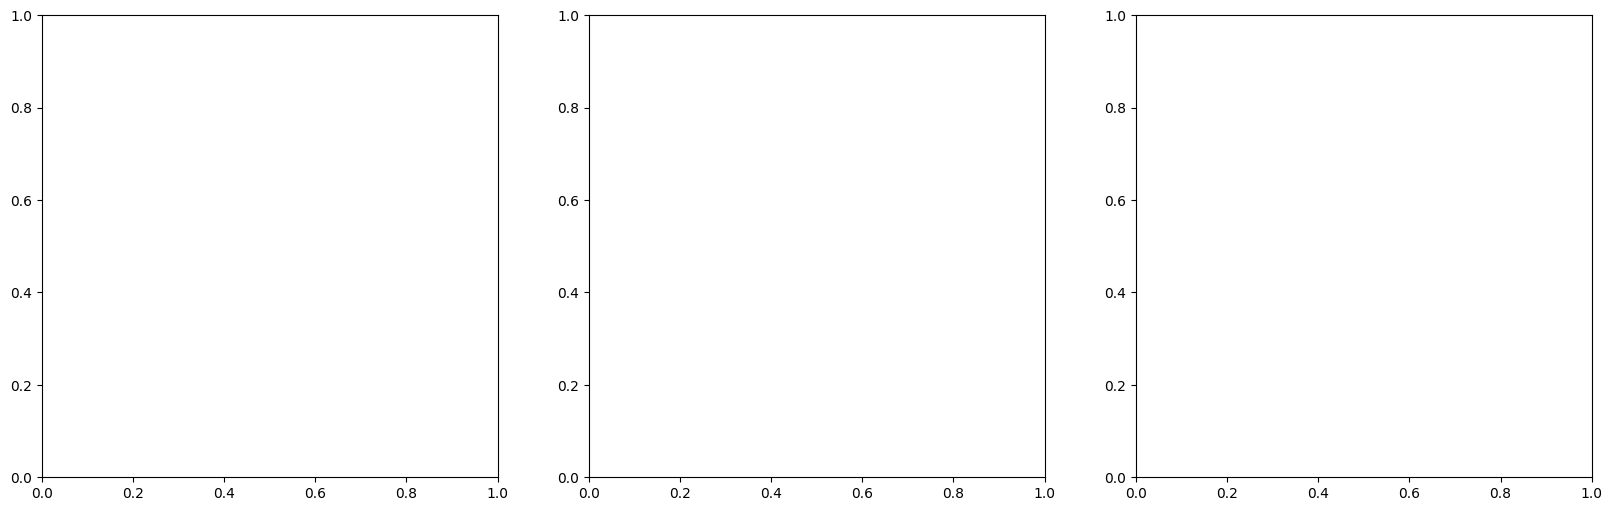

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to generate and plot LFR benchmark graphs
def generate_lfr_graphs(n, tau1, tau2, mu, average_degree, min_community, max_community, num_graphs=3):
    fig, axes = plt.subplots(1, num_graphs, figsize=(20, 6))
    
    for i in range(num_graphs):
        # Generate the LFR benchmark graph
        G = nx.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree, min_community=min_community, max_community=max_community, seed=i)

        # Extract communities
        communities = {frozenset(G.nodes[v]['community']) for v in G}

        # Plot the graph
        pos = nx.spring_layout(G)
        nx.draw_networkx_nodes(G, pos, ax=axes[i], node_size=20)
        nx.draw_networkx_edges(G, pos, ax=axes[i], alpha=0.5)
        for j, community in enumerate(communities):
            nx.draw_networkx_nodes(G, pos, nodelist=community, ax=axes[i], node_color=plt.cm.jet(j / len(communities)), node_size=20)
        
        axes[i].set_title(f'Graph {i+1}')
        axes[i].axis('off')

    plt.show()

# Parameters
n = 1000 # Number of nodes
tau1 = 3 # Degree distribution exponent
tau2 = 1.5 # Community size distribution exponent
mu = 0.1 # Mixing parameter (fraction of links between communities)
average_degree = 10 # Average degree
min_community = 20 # Minimum community size
max_community = 100 # Maximum community size

# Generate and plot the graphs
generate_lfr_graphs(n, tau1, tau2, mu, average_degree, min_community, max_community)


## Second Try

ExceededMaxIterations: Could not assign communities; try increasing min_community

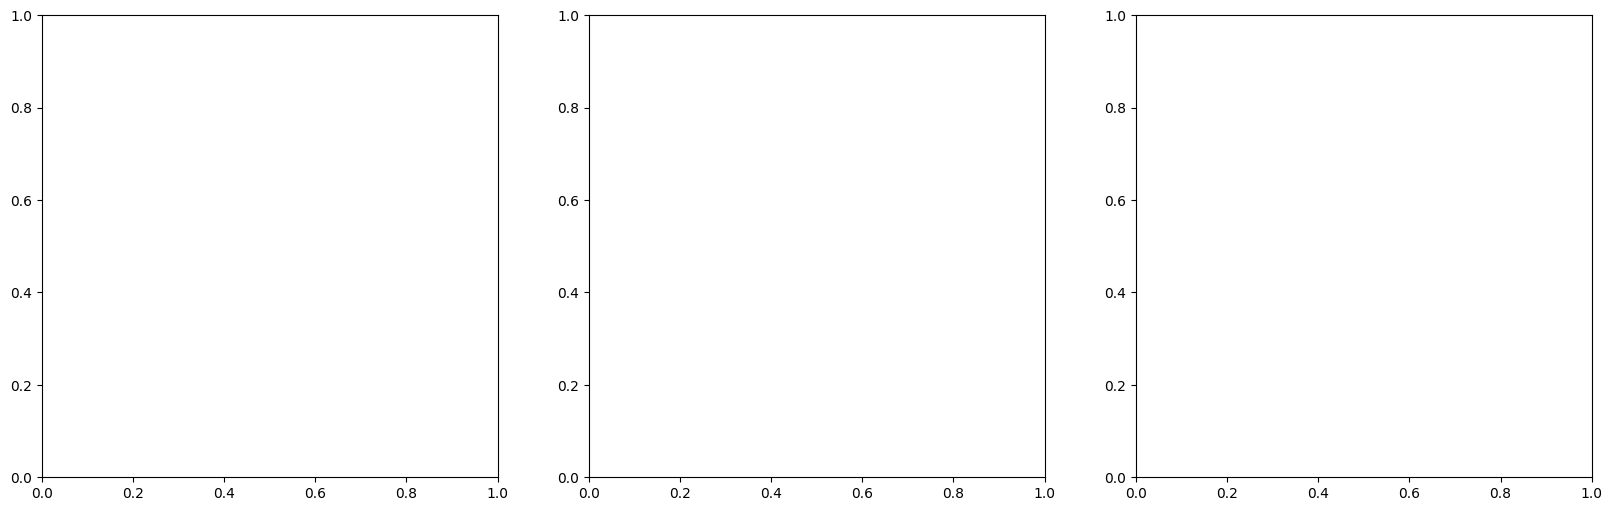

In [2]:
# Adjusted parameters for better feasibility
min_community = 30  # Increased minimum community size
mu = 0.2            # Increased mixing parameter

# Try generating and plotting the graphs again with adjusted parameters
generate_lfr_graphs(n, tau1, tau2, mu, average_degree, min_community, max_community)


## Third Try

ExceededMaxIterations: Could not assign communities; try increasing min_community

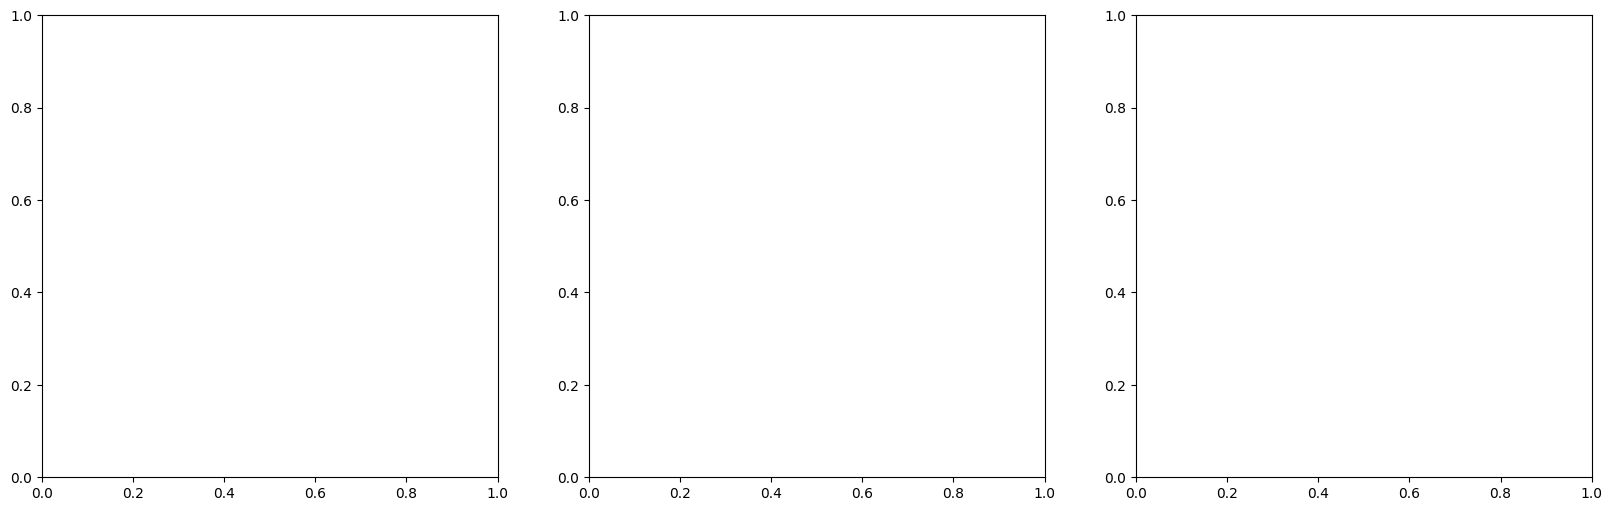

In [3]:
# Further adjusted parameters for feasibility
n = 500  # Reduced number of nodes
tau1 = 2.5  # Adjusted degree distribution exponent
tau2 = 1.2  # Adjusted community size distribution exponent
mu = 0.3   # Further increased mixing parameter
min_community = 50  # Increased minimum community size
max_community = 150  # Increased maximum community size

# Try generating and plotting the graphs again with further adjusted parameters
generate_lfr_graphs(n, tau1, tau2, mu, average_degree, min_community, max_community)


## Fourth (Successful) Try

### LFR Benchmark Graph Generation Explained

This code utilizes the LFR (Lancichinetti-Fortunato-Radicchi) benchmark graph generation method from the `networkx` library to create synthetic networks with a predefined community structure. The LFR model is popular for testing community detection algorithms as it can generate graphs with properties similar to real-world networks, such as power-law degree distributions and strong community structures.

### Function: `generate_lfr_graphs`

The function `generate_lfr_graphs` generates and visualizes `num_graphs` (3 by default) LFR benchmark graphs using the parameters provided. It follows these steps:

1. **Graph Generation:** For each graph, the `LFR_benchmark_graph` method is called with the given parameters. This method attempts to create a graph that adheres to the specified degree and community size distributions, while also respecting the mixing parameter.

2. **Community Extraction:** Each node in the graph has a 'community' attribute. The code extracts these communities and treats each as a separate group for visualization.

3. **Visualization:** The graphs are plotted using `matplotlib`. Nodes are colored based on their community, and the layout is determined by the `spring_layout` algorithm, which generally positions nodes such that those with more connections are closer together.

### Parameters Explanation

1. **Number of Nodes (`n`):** This specifies the total number of nodes in the graph. A lower number (100 in this case) makes the graph generation and visualization more manageable.

2. **Degree Distribution Exponent (`tau1`):** This controls the power-law distribution of node degrees (number of connections each node has). A value of 3 implies that few nodes will have a high degree while most will have a low degree, mimicking real-world social networks.

3. **Community Size Distribution Exponent (`tau2`):** Similar to `tau1`, but for the distribution of community sizes. A value of 1.5 results in a distribution where most communities are small, but a few larger ones exist.

4. **Mixing Parameter (`mu`):** This parameter determines the fraction of a node's edges that connect to nodes outside its community. A low value (0.1) means that most edges are within communities, creating a strong community structure.

5. **Average Degree (`average_degree`):** This is the average number of connections each node has. In this case, 5 represents a relatively sparse network.

6. **Community Size Range (`min_community`, `max_community`):** These define the minimum and maximum sizes for communities. The range from 10 to 50 allows for variability in community sizes.


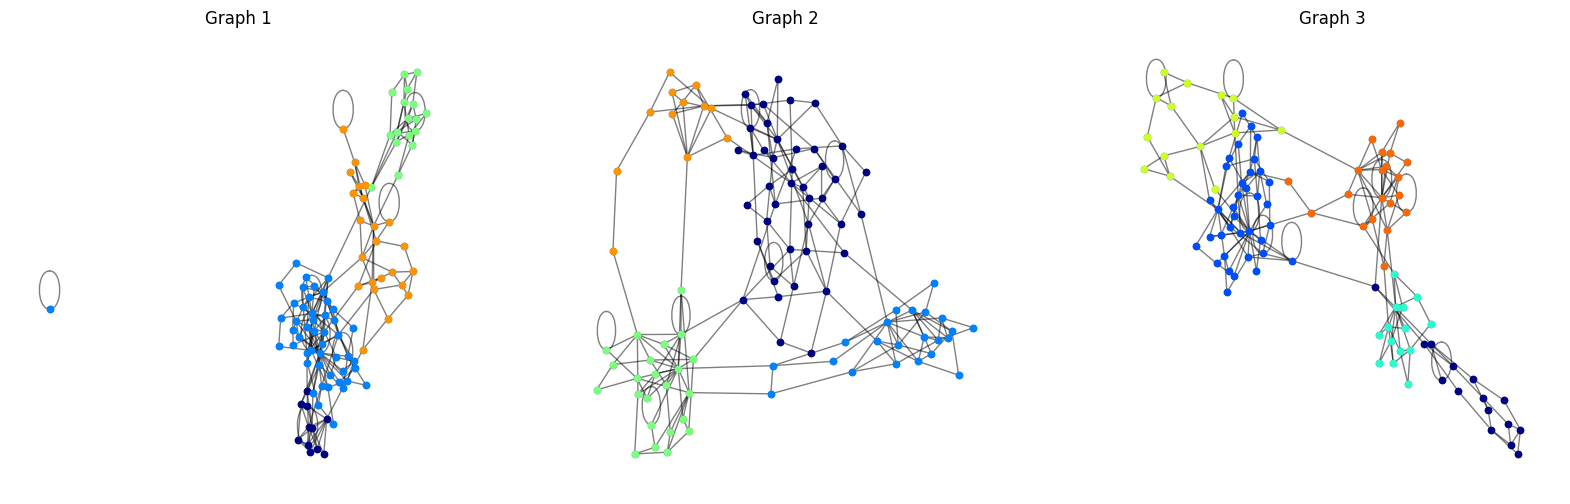

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# Simplified parameters for more reliable graph generation
n = 100  # Reduced number of nodes
tau1 = 3  # Degree distribution exponent
tau2 = 1.5  # Community size distribution exponent
mu = 0.1  # Mixing parameter
average_degree = 5  # Average degree
min_community = 10  # Minimum community size
max_community = 50  # Maximum community size

# Function to generate and plot LFR benchmark graphs
def generate_lfr_graphs(n, tau1, tau2, mu, average_degree, min_community, max_community, num_graphs=3):
    fig, axes = plt.subplots(1, num_graphs, figsize=(20, 6))
    
    for i in range(num_graphs):
        # Generate the LFR benchmark graph
        G = nx.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree, min_community=min_community, max_community=max_community, seed=i)

        # Extract communities
        communities = {frozenset(G.nodes[v]['community']) for v in G}

        # Plot the graph
        pos = nx.spring_layout(G)
        nx.draw_networkx_nodes(G, pos, ax=axes[i], node_size=20)
        nx.draw_networkx_edges(G, pos, ax=axes[i], alpha=0.5)
        for j, community in enumerate(communities):
            nx.draw_networkx_nodes(G, pos, nodelist=community, ax=axes[i], node_color=plt.cm.jet(j / len(communities)), node_size=20)
        
        axes[i].set_title(f'Graph {i+1}')
        axes[i].axis('off')

    plt.show()

# Generate and plot the graphs with simplified parameters
generate_lfr_graphs(n, tau1, tau2, mu, average_degree, min_community, max_community)


### Resulting Graphs and Their Interpretation

The resulting graphs demonstrate networks where nodes are grouped into communities. Nodes within the same community are more densely connected to each other than to nodes in other communities. The strength of these community structures is controlled by the mixing parameter `mu`.

### Context of the Original Problem

The original inspiration was to write code to generate graphs that demonstrates the `LFR_benchmark_graph` method's ability to specify the number of communities, their internal and external connectivity, and their community sizes. The code achieves this by setting relevant parameters and generating multiple graphs to illustrate the variability and capabilities of the LFR model.

The simplified parameters were chosen after initial attempts with more complex settings encountered issues in graph generation, likely due to the intricate balance required between the parameters in the LFR model. This simplified approach provides a clearer demonstration of the method's capabilities in a more controlled and visually interpretable manner.

## Generating/Saving a Dozen Graphs

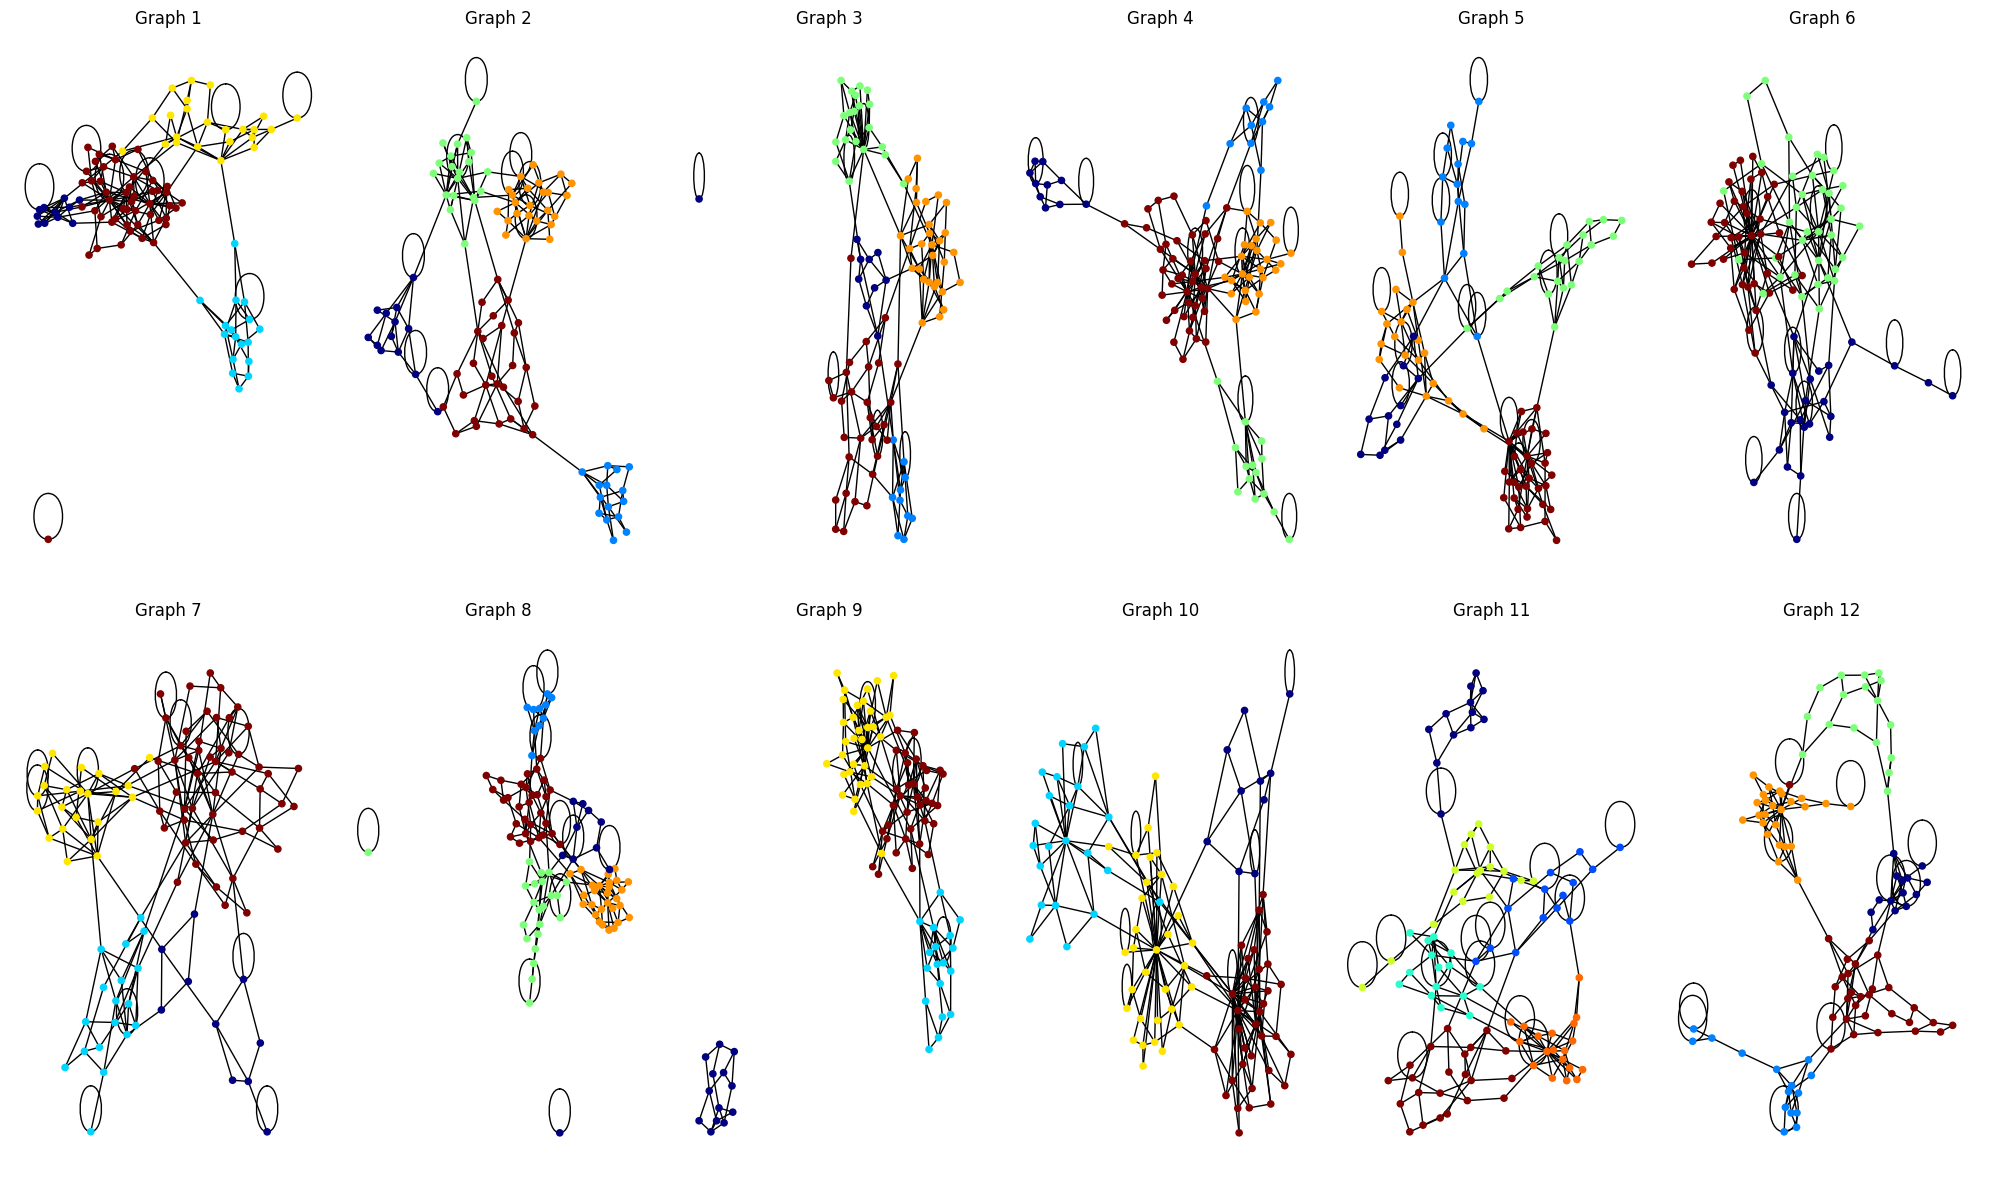

In [1]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import json

# Simplified parameters for more reliable graph generation
n = 100  # Reduced number of nodes
tau1 = 3  # Degree distribution exponent
tau2 = 1.5  # Community size distribution exponent
mu = 0.1  # Mixing parameter
average_degree = 5  # Average degree
min_community = 10  # Minimum community size
max_community = 50  # Maximum community size
num_graphs = 12  # Number of graphs to generate

# Check if the directory exists, if not, create it
directory = "LFR_graph_datasets"
if not os.path.exists(directory):
    os.makedirs(directory)

def generate_and_save_lfr_graphs(n, tau1, tau2, mu, average_degree, min_community, max_community, num_graphs=12):
    nrows = 2  # Number of rows of subplots in the figure
    ncols = num_graphs // nrows + (num_graphs % nrows > 0)  # Number of columns of subplots
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 12))  # Create a figure with subplots
    axes = axes.flatten()  # Flatten the axes array for easy access
    color_mappings = {}

    for graph_index in range(num_graphs):
        graph_generated = False
        for attempt in range(10):  # Try up to 10 times to generate each graph
            try:
                seed = graph_index * 10 + attempt  # Vary seed for each attempt
                G = nx.LFR_benchmark_graph(n, tau1, tau2, mu, average_degree, min_community=min_community, max_community=max_community, seed=seed)
                pos = nx.spring_layout(G)

                communities = {frozenset(G.nodes[v]['community']) for v in G}
                community_list = sorted(communities, key=lambda x: (len(x), min(x)))
                community_color = {comm: idx for idx, comm in enumerate(community_list)}
                node_color = [community_color[frozenset(G.nodes[node]['community'])] for node in G]

                ax = axes[graph_index]  # Get the corresponding subplot axis
                nx.draw(G, pos, ax=ax, node_color=node_color, cmap=plt.cm.jet, node_size=20, with_labels=False)
                ax.set_title(f'Graph {graph_index + 1}')
                ax.axis('off')

                graph_filename = os.path.join(directory, f"graph_{graph_index + 1}.graphml")
                for node in G.nodes(data=True):
                    node[1]['community'] = ','.join(map(str, sorted(node[1]['community'])))
                nx.write_graphml(G, graph_filename)

                color_mappings[str(graph_index)] = {','.join(map(str, sorted(comm))): idx for comm, idx in community_color.items()}
                graph_generated = True
                break  # Break out of the attempt loop if successful
            except nx.ExceededMaxIterations:
                continue  # Try again with a new seed

        if not graph_generated:
            print(f"Could not generate graph {graph_index + 1} after {attempt + 1} attempts")

    # Adjust the layout
    plt.tight_layout()
    plt.show()

    # Save the color mappings to a file for later use
    color_mapping_file = os.path.join(directory, 'color_mappings.json')
    with open(color_mapping_file, 'w') as f:
        json.dump(color_mappings, f)

generate_and_save_lfr_graphs(n, tau1, tau2, mu, average_degree, min_community, max_community, num_graphs)


## Loading the Dozen Graphs

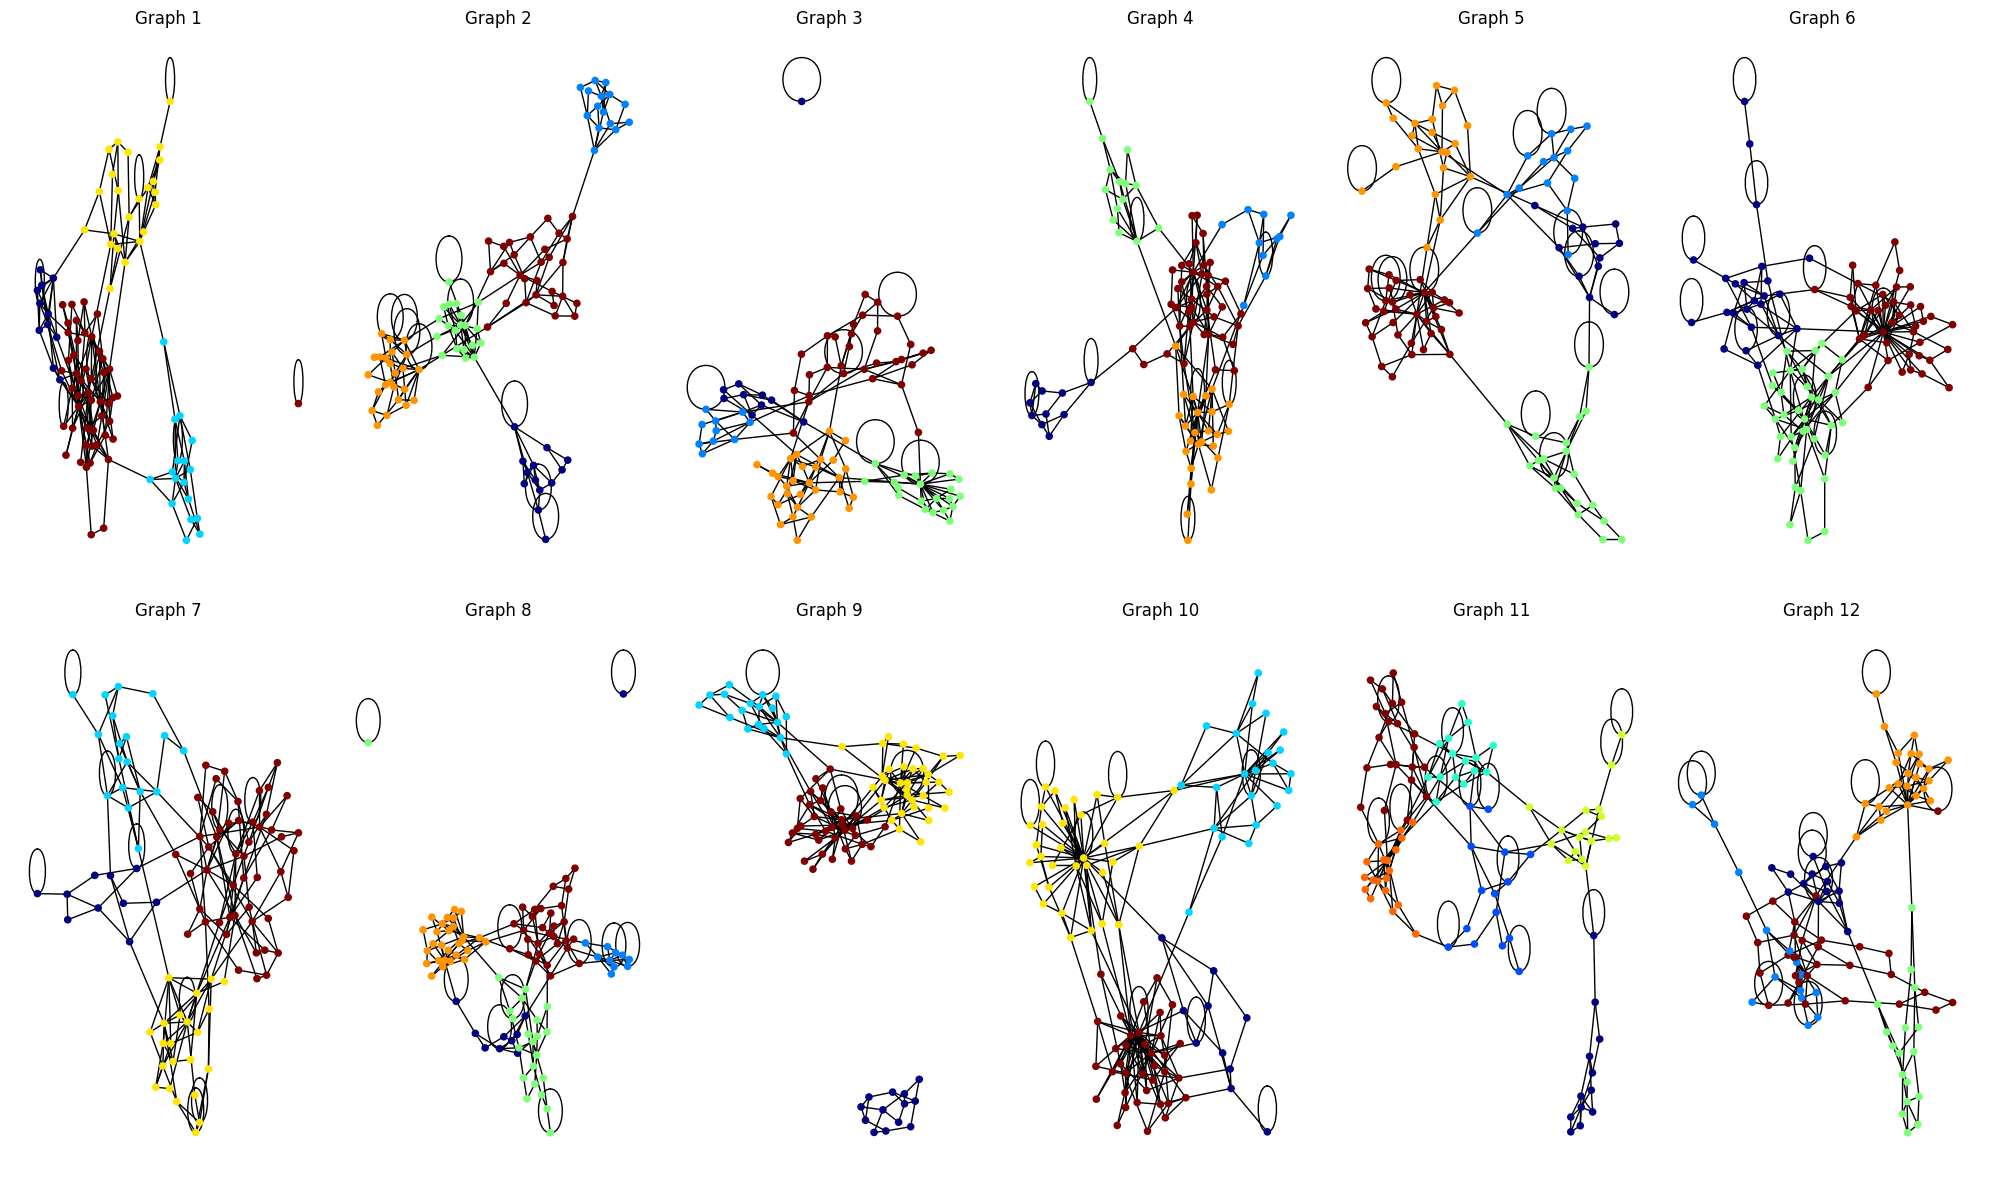

In [3]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import json

def load_and_plot_graphs(directory, num_graphs):
    # Load color mappings from file
    color_mapping_file = os.path.join(directory, 'color_mappings.json')
    with open(color_mapping_file, 'r') as f:
        color_mappings = json.load(f)

    nrows = 2  # Number of rows for subplots
    ncols = num_graphs // nrows + (num_graphs % nrows > 0)  # Number of columns for subplots

    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 12))  # Create a figure with subplots
    axes = axes.flatten()  # Flatten the axes array for easy access

    for graph_index in range(num_graphs):
        graph_filename = os.path.join(directory, f"graph_{graph_index + 1}.graphml")
        if os.path.exists(graph_filename):
            G = nx.read_graphml(graph_filename)

            # Update how we retrieve community attribute
            for node in G.nodes(data=True):
                node[1]['community'] = ','.join(map(str, sorted(map(int, node[1]['community'].split(',')))))
            node_color = [color_mappings[str(graph_index)][G.nodes[node]['community']] for node in G]

            ax = axes[graph_index]  # Get the corresponding subplot axis
            pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm
            nx.draw(G, pos, ax=ax, node_color=node_color, cmap=plt.cm.jet, node_size=20, with_labels=False)
            ax.set_title(f'Graph {graph_index + 1}')
            ax.axis('off')
        else:
            print(f"File not found: {graph_filename}")

    # Adjust the layout
    plt.tight_layout()
    plt.show()

directory = os.path.join(os.getcwd(), "LFR_graph_datasets")
load_and_plot_graphs(directory, num_graphs)
